In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, "../code-previous")

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import sklearn.feature_extraction as skfeatures
import utils
import time
import os

from unicodedata import category
from tqdm import tqdm_notebook as tqdm
tqdm.pandas(desc="Example Desc")

import seaborn as sns
sns.set_style('white')
import matplotlib.pylab as plt

import WOSutilities as wosutil

path2rawdata = '/mnt/disks/vault/wos2017-parsed/'

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
data = pd.read_pickle("/mnt/disks/vault/citation-data-all/article-cat-c5-merged.pql")

Articles are only from Applied Physics category

In [5]:
data.columns

Index(['ArticleID', 'PubYear_x', 'Doctypes', 'Title', 'Type', 'Label',
       'PubYear_y', 'c5'],
      dtype='object')

In [6]:
years = data["PubYear_x"].unique()
years.sort()
years

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [19]:
# correction - adding 1 to all the citation counts (for easiness of log scale calculations)
# and taking the log scale on it
import numpy as np

data['log_c5'] = data['c5'].progress_apply(lambda x: np.log(x+1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f723ef1dc88>]],
      dtype=object)

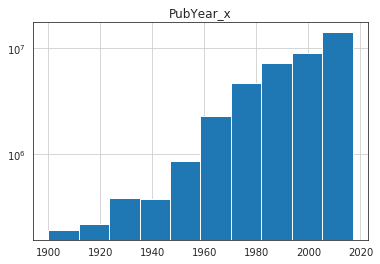

In [7]:
# number of publications
data.hist(column='PubYear_x', log=True)

In [8]:
len(data)

39171597

In [9]:
data.head()

,ArticleID,PubYear_x,Doctypes,Title,Type,Label,PubYear_y,c5
0,A1981LC59600003,1981,Article,SPORADIC LEGIONELLOSIS IN THE UNITED-STATES - ...,NaN,NaN,1981.0,48.0
1,A1981LC51800016,1981,Article,REACTION OF LEAD PERCHLORATE WITH AMMONIUM HYD...,NaN,NaN,1981.0,0.0
2,A1981MP52000011,1981,Article,ELECTRICAL PACING FOR SHORT BOWEL SYNDROME,NaN,NaN,1981.0,5.0
3,A1981LZ55900001,1981,Review,STABILITY TESTING OF SOLID DRUGS USING PREFERE...,NaN,NaN,1981.0,3.0
4,A1981ME20500010,1981,Article,ON THE DETERMINATION OF THE 1ST NORMAL STRESS ...,NaN,NaN,1981.0,1.0


In [10]:
len(data[data.Title == None])

0

In [13]:
# clean up puctuations from titles
sample = data.head(100)

# there are some titles with some problems - to be identified
def remove_punct(s):
    op = ''
    try:
        op = ''.join(ch for ch in str(s) if category(ch)[0] != 'P')
    except:
        op = ''
    return op
    
    

data['title_without_punctuations'] = data['Title'].progress_apply(lambda x: remove_punct(x))

Example Desc: 100%|██████████| 39171597/39171597 [11:56<00:00, 54693.47it/s]


In [25]:
data.head()

1

In [22]:
#count of words in the title

def count_words(s):
    words = 0
    try:
        words = len(s.split())
    except:
        pass
    return words

In [23]:
data["words_in_title"] = data["Title"].progress_apply(lambda x: count_words(x))




Example Desc:   0%|          | 0/39171597 [00:00<?, ?it/s]


Example Desc:   0%|          | 1/39171597 [00:01<16216:02:52,  1.49s/it]


Example Desc:   0%|          | 51394/39171597 [00:01<11336:20:49,  1.04s/it]


Example Desc:   0%|          | 103583/39171597 [00:01<7924:51:46,  1.37it/s]


Example Desc:   0%|          | 157060/39171597 [00:01<5539:49:00,  1.96it/s]


Example Desc:   1%|          | 212476/39171597 [00:01<3872:22:09,  2.79it/s]


Example Desc:   1%|          | 267480/39171597 [00:01<2706:50:14,  3.99it/s]


Example Desc:   1%|          | 323446/39171597 [00:02<1892:03:58,  5.70it/s]


Example Desc:   1%|          | 380019/39171597 [00:02<1322:31:24,  8.15it/s]


Example Desc:   1%|          | 435646/39171597 [00:02<924:26:40, 11.64it/s] 


Example Desc:   1%|▏         | 492093/39171597 [00:02<646:10:26, 16.63it/s]


Example Desc:   1%|▏         | 548666/39171597 [00:02<451:39:57, 23.75it/s]


Example Desc:   2%|▏         | 606072/39171597 [00:02<315:42:06, 33.93it/

Example Desc:  13%|█▎        | 5182411/39171597 [00:10<01:00, 564836.14it/s]


Example Desc:  13%|█▎        | 5238897/39171597 [00:10<01:00, 564734.80it/s]


Example Desc:  14%|█▎        | 5295845/39171597 [00:10<00:59, 566147.38it/s]


Example Desc:  14%|█▎        | 5352959/39171597 [00:11<00:59, 567632.10it/s]


Example Desc:  14%|█▍        | 5410479/39171597 [00:11<00:59, 569880.03it/s]


Example Desc:  14%|█▍        | 5467471/39171597 [00:11<00:59, 564265.15it/s]


Example Desc:  14%|█▍        | 5524870/39171597 [00:11<00:59, 567145.58it/s]


Example Desc:  14%|█▍        | 5582573/39171597 [00:11<00:58, 570073.31it/s]


Example Desc:  14%|█▍        | 5640193/39171597 [00:11<00:58, 571896.54it/s]


Example Desc:  15%|█▍        | 5697599/39171597 [00:11<00:58, 572543.21it/s]


Example Desc:  15%|█▍        | 5754862/39171597 [00:11<00:58, 571791.62it/s]


Example Desc:  15%|█▍        | 5812047/39171597 [00:11<00:58, 571728.74it/s]


Example Desc:  15%|█▍        | 5869486/39171597 [00:

Example Desc:  26%|██▋       | 10332653/39171597 [00:20<00:49, 581535.66it/s]


Example Desc:  27%|██▋       | 10390830/39171597 [00:20<00:49, 580553.35it/s]


Example Desc:  27%|██▋       | 10449678/39171597 [00:20<00:49, 582905.69it/s]


Example Desc:  27%|██▋       | 10508354/39171597 [00:20<00:49, 584014.83it/s]


Example Desc:  27%|██▋       | 10567935/39171597 [00:20<00:48, 587502.14it/s]


Example Desc:  27%|██▋       | 10626698/39171597 [00:20<00:48, 584969.13it/s]


Example Desc:  27%|██▋       | 10685206/39171597 [00:20<00:49, 574288.40it/s]


Example Desc:  27%|██▋       | 10742687/39171597 [00:20<00:50, 563381.41it/s]


Example Desc:  28%|██▊       | 10799108/39171597 [00:20<00:50, 556757.25it/s]


Example Desc:  28%|██▊       | 10854859/39171597 [00:20<00:51, 552476.12it/s]


Example Desc:  28%|██▊       | 10910167/39171597 [00:21<00:51, 549882.68it/s]


Example Desc:  28%|██▊       | 10965201/39171597 [00:21<00:51, 549269.23it/s]


Example Desc:  28%|██▊       | 11020160/

Example Desc:  39%|███▉      | 15386842/39171597 [00:29<00:45, 527710.08it/s]


Example Desc:  39%|███▉      | 15439619/39171597 [00:29<00:44, 527722.16it/s]


Example Desc:  40%|███▉      | 15492844/39171597 [00:29<00:44, 529070.30it/s]


Example Desc:  40%|███▉      | 15546302/39171597 [00:29<00:44, 530709.14it/s]


Example Desc:  40%|███▉      | 15599574/39171597 [00:29<00:44, 531307.92it/s]


Example Desc:  40%|███▉      | 15652721/39171597 [00:29<00:44, 531355.17it/s]


Example Desc:  40%|████      | 15705859/39171597 [00:29<00:44, 530724.67it/s]


Example Desc:  40%|████      | 15759377/39171597 [00:30<00:44, 532052.10it/s]


Example Desc:  40%|████      | 15813978/39171597 [00:30<00:43, 536144.53it/s]


Example Desc:  41%|████      | 15870689/39171597 [00:30<00:42, 545071.47it/s]


Example Desc:  41%|████      | 15926821/39171597 [00:30<00:42, 549844.23it/s]


Example Desc:  41%|████      | 15984729/39171597 [00:30<00:41, 558298.85it/s]


Example Desc:  41%|████      | 16042031/

Example Desc:  52%|█████▏    | 20380483/39171597 [00:38<00:33, 553521.86it/s]


Example Desc:  52%|█████▏    | 20438366/39171597 [00:38<00:33, 560877.83it/s]


Example Desc:  52%|█████▏    | 20495541/39171597 [00:38<00:33, 564093.98it/s]


Example Desc:  52%|█████▏    | 20554513/39171597 [00:38<00:32, 571541.84it/s]


Example Desc:  53%|█████▎    | 20613921/39171597 [00:39<00:32, 578119.41it/s]


Example Desc:  53%|█████▎    | 20672491/39171597 [00:39<00:31, 580370.60it/s]


Example Desc:  53%|█████▎    | 20730582/39171597 [00:39<00:31, 580528.33it/s]


Example Desc:  53%|█████▎    | 20788831/39171597 [00:39<00:31, 581114.36it/s]


Example Desc:  53%|█████▎    | 20846969/39171597 [00:39<00:31, 578312.45it/s]


Example Desc:  53%|█████▎    | 20905418/39171597 [00:39<00:31, 580147.59it/s]


Example Desc:  54%|█████▎    | 20964265/39171597 [00:39<00:31, 582618.42it/s]


Example Desc:  54%|█████▎    | 21022715/39171597 [00:39<00:31, 583181.37it/s]


Example Desc:  54%|█████▍    | 21081604/

Example Desc:  65%|██████▍   | 25420560/39171597 [00:48<00:26, 519323.54it/s]


Example Desc:  65%|██████▌   | 25473047/39171597 [00:48<00:26, 520974.54it/s]


Example Desc:  65%|██████▌   | 25525173/39171597 [00:48<00:26, 521058.80it/s]


Example Desc:  65%|██████▌   | 25577374/39171597 [00:48<00:26, 521343.57it/s]


Example Desc:  65%|██████▌   | 25629724/39171597 [00:48<00:25, 521988.04it/s]


Example Desc:  66%|██████▌   | 25681925/39171597 [00:48<00:25, 521147.53it/s]


Example Desc:  66%|██████▌   | 25734042/39171597 [00:48<00:25, 520209.73it/s]


Example Desc:  66%|██████▌   | 25786065/39171597 [00:48<00:25, 519969.39it/s]


Example Desc:  66%|██████▌   | 25838556/39171597 [00:48<00:25, 521440.08it/s]


Example Desc:  66%|██████▌   | 25890702/39171597 [00:48<00:25, 518238.11it/s]


Example Desc:  66%|██████▌   | 25942532/39171597 [00:49<00:25, 514292.10it/s]


Example Desc:  66%|██████▋   | 25993973/39171597 [00:49<00:25, 512464.77it/s]


Example Desc:  66%|██████▋   | 26045229/

Example Desc:  77%|███████▋  | 30193887/39171597 [00:57<00:16, 546217.65it/s]


Example Desc:  77%|███████▋  | 30250081/39171597 [00:57<00:16, 550839.81it/s]


Example Desc:  77%|███████▋  | 30305207/39171597 [00:57<00:16, 542984.88it/s]


Example Desc:  78%|███████▊  | 30360926/39171597 [00:57<00:16, 547168.78it/s]


Example Desc:  78%|███████▊  | 30415689/39171597 [00:57<00:16, 541500.97it/s]


Example Desc:  78%|███████▊  | 30469885/39171597 [00:57<00:16, 541555.91it/s]


Example Desc:  78%|███████▊  | 30524073/39171597 [00:57<00:16, 532501.98it/s]


Example Desc:  78%|███████▊  | 30578600/39171597 [00:58<00:16, 536268.93it/s]


Example Desc:  78%|███████▊  | 30633996/39171597 [00:58<00:15, 541456.23it/s]


Example Desc:  78%|███████▊  | 30689398/39171597 [00:58<00:15, 545160.29it/s]


Example Desc:  78%|███████▊  | 30745291/39171597 [00:58<00:15, 549216.50it/s]


Example Desc:  79%|███████▊  | 30800246/39171597 [00:58<00:15, 547050.54it/s]


Example Desc:  79%|███████▉  | 30854977/

Example Desc:  90%|████████▉ | 35164040/39171597 [01:06<00:07, 515387.60it/s]


Example Desc:  90%|████████▉ | 35217061/39171597 [01:06<00:07, 519743.07it/s]


Example Desc:  90%|█████████ | 35269056/39171597 [01:06<00:07, 513885.18it/s]


Example Desc:  90%|█████████ | 35320474/39171597 [01:06<00:07, 511640.62it/s]


Example Desc:  90%|█████████ | 35372765/39171597 [01:07<00:07, 514969.16it/s]


Example Desc:  90%|█████████ | 35424283/39171597 [01:07<00:07, 511947.68it/s]


Example Desc:  91%|█████████ | 35475652/39171597 [01:07<00:07, 512467.82it/s]


Example Desc:  91%|█████████ | 35526912/39171597 [01:07<00:07, 511405.33it/s]


Example Desc:  91%|█████████ | 35578376/39171597 [01:07<00:07, 512369.41it/s]


Example Desc:  91%|█████████ | 35630570/39171597 [01:07<00:06, 515202.22it/s]


Example Desc:  91%|█████████ | 35682100/39171597 [01:07<00:06, 515074.04it/s]


Example Desc:  91%|█████████ | 35733956/39171597 [01:07<00:06, 516114.68it/s]


Example Desc:  91%|█████████▏| 35785573/

In [24]:
# average number of words in paper titles of a year
grouped_df_titlecount = data.groupby('PubYear_y', as_index=False)['words_in_title'].mean()
grouped_df_avgcit = data.groupby('PubYear_y', as_index=False)['log_c5'].mean()

In [25]:
grouped_dfs = grouped_df_titlecount.merge(grouped_df_avgcit,
                                          how = 'left',
                                          on = 'PubYear_y')
grouped_dfs.head()

,PubYear_y,words_in_title,log_c5
0,1900.0,8.543738,0.044886
1,1901.0,8.637255,0.041285
2,1902.0,8.827803,0.046863
3,1903.0,8.798725,0.058912
4,1904.0,8.773372,0.064107


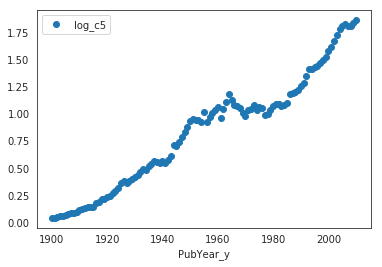

In [26]:
# variation of c5 counts with year
grouped_dfs.plot(x='PubYear_y', y='log_c5', style='o')

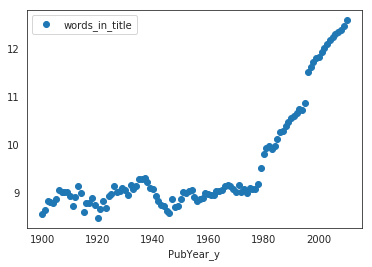

In [27]:
#variation of words_in_title with year
grouped_dfs.plot(x='PubYear_y', y='words_in_title', style='o')